In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_path = r'E:\Project Speech recognize\Data\10hzto50hztest.mp3'

In [3]:
y, sr = librosa.load(file_path)

In [5]:
# Tạo mảng thời gian tương ứng với mỗi mẫu
time = librosa.times_like(y, sr=sr)
print(time)
print(len(time)/sr)

[0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 1.60733402e+04
 1.60733634e+04 1.60733867e+04]
31.393378684807256


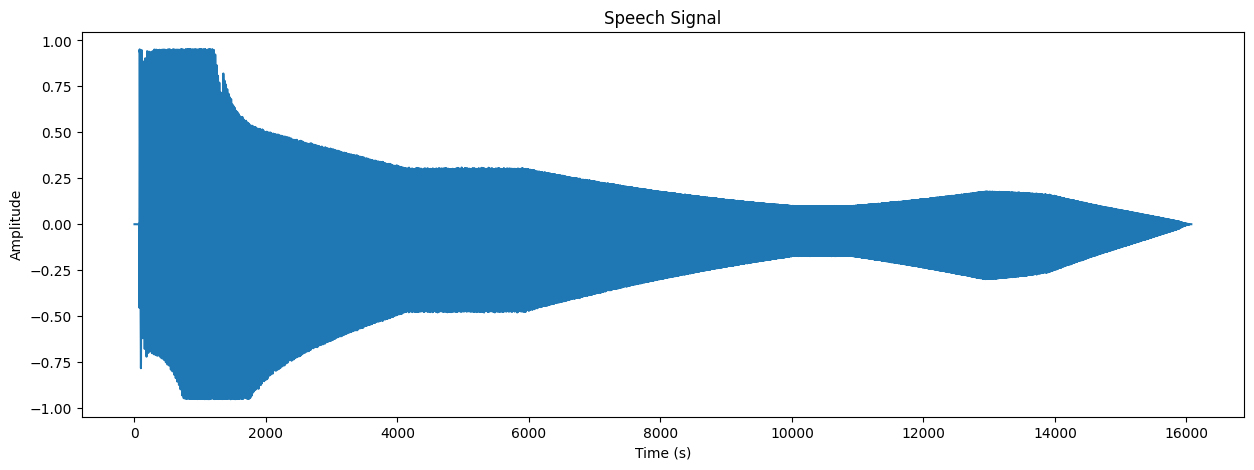

In [19]:
plt.figure(figsize=(15, 5))
plt.title('Speech Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.plot(time, y)

In [20]:
# Tính toán phổ
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

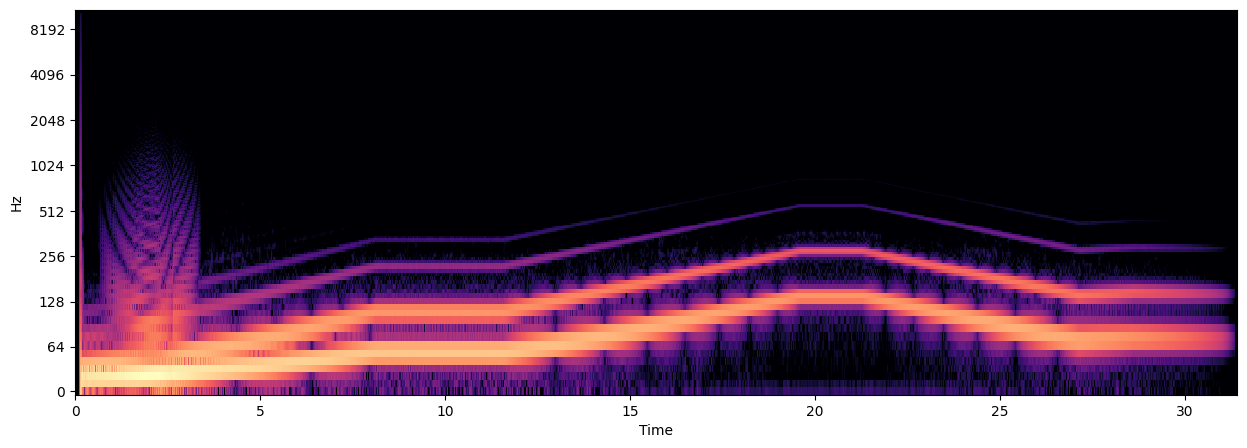

In [21]:
# Hiển thị biểu đồ phổ
plt.figure(figsize=(15, 5))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')

In [41]:
def f(x):
    b = x@x
    return b - 5*x

In [44]:
A = np.array([[1,1],[0,1]])
print(A@A@A)

[[1 3]
 [0 1]]


In [42]:
print(f(A))

[[-6 -1 -3]
 [-6 -6 -5]
 [-3  4 -2]]


In [6]:
import numpy as np
import scipy.io.wavfile as wavfile
from sklearn.decomposition import NMF

In [8]:
file_path = r"E:\Project Speech recognize\Data\test.wav"
sample_rate, mixture = wavfile.read(file_path)
mixture = mixture / np.max(np.abs(mixture)) # normalize the mixture

ValueError: File format b'\x00\x00\x00\x18' not understood. Only 'RIFF' and 'RIFX' supported.

In [9]:
n_components = 2 # number of sources to separate
time_steps = mixture.shape[1]
window_size = round(0.01 * sample_rate) # 10 ms window size
overlap = round(0.005 * sample_rate) # 5 ms overlap

# Compute the STFT of the mixture
mixture_stft = np.abs(np.array([np.fft.rfft(mixture[:, t], window_size) for t in range(0, time_steps, overlap)]))

# Apply NMF to the magnitude spectrogram of the mixture
nmf = NMF(n_components=n_components, init='nndsvd', random_state=0)
nmf.fit(mixture_stft)

NameError: name 'mixture' is not defined

In [ ]:
# Reconstruct the estimated sources
sources_stft = nmf.transform(mixture_stft)
sources = np.array([np.real(np.fft.irfft(sources_stft[:, t], window_size)) for t in range(sources_stft.shape[1])])
sources = np.array([source / np.linalg.norm(source) for source in sources])

In [ ]:
for i in range(sources.shape[0]):
    wavfile.write(f'source_{i}.wav', sample_rate, sources[i])

print(sources)